In [1]:
import os
import json
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import grid2op
from grid2op.PlotGrid import PlotMatplot
from pprint import pprint

## Load ENV

In [2]:
# Defin ENV path
env_path = os.path.abspath('/Users/camiloromero/Downloads/wcci_2020_test/')

# Define Chronics path
chronics_path = os.path.join(env_path, 'chronics')

In [3]:
# # Correct WCCI ENV
# with open('r2_to_118.json') as f:
#     r2_118 = json.load(f)

In [4]:
# scenarios = next(os.walk(chronics_path))[1]
# scenarios

In [5]:
# # Modify maintenance
# for scenario in scenarios:
#     try:
#         maint_path = os.path.join(chronics_path, scenario, 'maintenance.csv.bz2')
#         maint = pd.read_csv(maint_path, sep=';')
#         maint.rename(columns={l:r2_118['line'][l] for l in maint.columns}, inplace=True)
#         maint.to_csv(maint_path, sep=';', index=False)
#     except:
#         continue

In [6]:
# Load ENV
env = grid2op.make(env_path)

In [7]:
env.backend.get_thermal_limit()

array([ 43.3, 205.2, 341.2, 204. , 601.4, 347.1, 319.6, 301.4, 330.3,
       274.1, 307.4, 172.3, 354.3, 127.9, 174.9, 152.6,  81.8, 204.3,
       561.5, 561.5,  98.7, 179.8, 193.4, 239.9, 164.8, 100.4, 125.7,
       278.2, 274. ,  89.9, 352.1, 157.1, 124.4, 154.6,  86.1, 106.7,
       148.5, 129.6, 136.1,  86. , 313.2, 198.5, 599.1, 206.8, 233.7,
       395.8, 516.7, 656.4, 583. , 583. , 263.1, 222.6, 322.8, 340.6,
       305.2, 360.1, 395.8, 274.2, 605.5], dtype=float32)

## Line id finder

In [8]:
# To find lines
info_lines = {i:(l[0], l[1]) for i, l in enumerate(zip(env.line_or_to_subid, env.line_ex_to_subid))}

## Plot grid

/opt/anaconda3/lib/python3.7/site-packages/grid2op/PlotGrid/PlotMatplot.py:541: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  figure.tight_layout()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


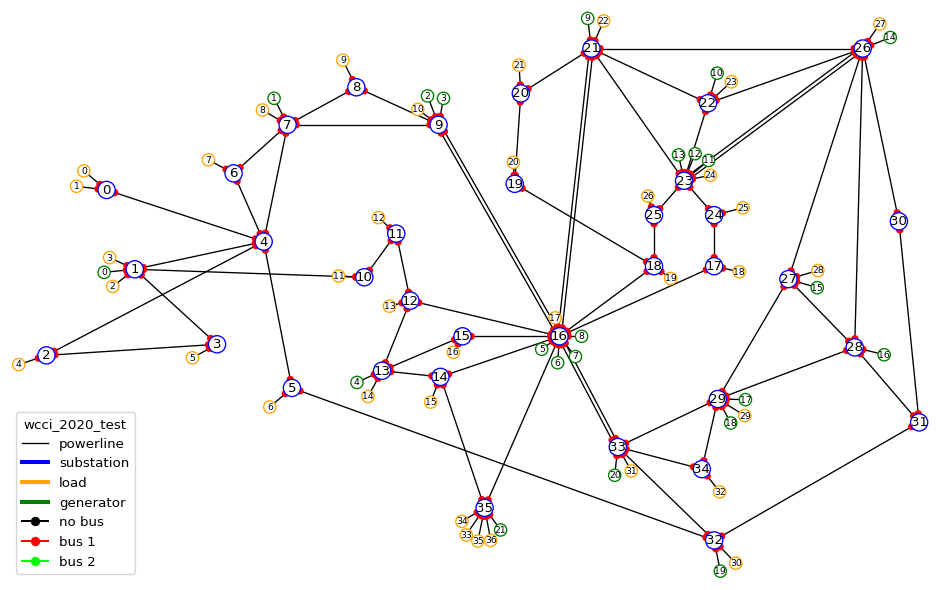

In [9]:
plot_helper = PlotMatplot(env.observation_space, 
                          sub_radius=14, 
                          load_radius=10, 
                          gen_radius=10,
                          width=950,
                          height=600,
                        )
plot_helper._line_bus_radius = 6
plot_helper._line_arrow_width = 10
plot_helper._line_arrow_len = 17


fig = plot_helper.plot_layout()
fig.show()

## Helper func to plot

In [10]:
def plot_action(action):
    obs = env.reset()
    obs, reward, done, info = env.step(env.action_space(action))
    fig_obs = plot_helper.plot_obs(obs, line_info=None, load_info=None, gen_info=None)
    print('Is ambigous??? -> {}'.format(info['is_ambiguous']))
    print('Exception => {}'.format(info['exception']))
    print()
    return fig_obs

## Proposed States for Oracle

In [11]:
import sys

sys.path.append('../')

In [12]:
from sub_elems import get_valid_sub_action
from sub_elems import get_valid_line_action

In [13]:
action_space = env.action_space

states = {}

## Helper func to append unitary actions

In [14]:
def append_unitary_actions(elem, ut):
    elem_type, elem_id = elem.split('_')
    k_name = f'{elem_type}_{elem_id}'
    if elem_type == 'sub':
        states[k_name] = {string.ascii_lowercase[i]: d[int(elem_id)] for i, d in enumerate(ut)}
    if elem_type == 'line':
        states[k_name] = {'a': ut[int(elem_id)],
                          'b': {"set_line": 0}
                         }   

## Substation 26

In [15]:
sub_id = 26

In [16]:
unit_sub_1 = {sub_id: {"lines_id_bus": [(37, 2), (39, 2)], 
                       "loads_id_bus": [(27, 2)],
                       "gens_id_bus": [(14, 2)],
                      },
             }

/opt/anaconda3/lib/python3.7/site-packages/grid2op/PlotGrid/PlotMatplot.py:541: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  figure.tight_layout()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


Is ambigous??? -> False
Exception => []



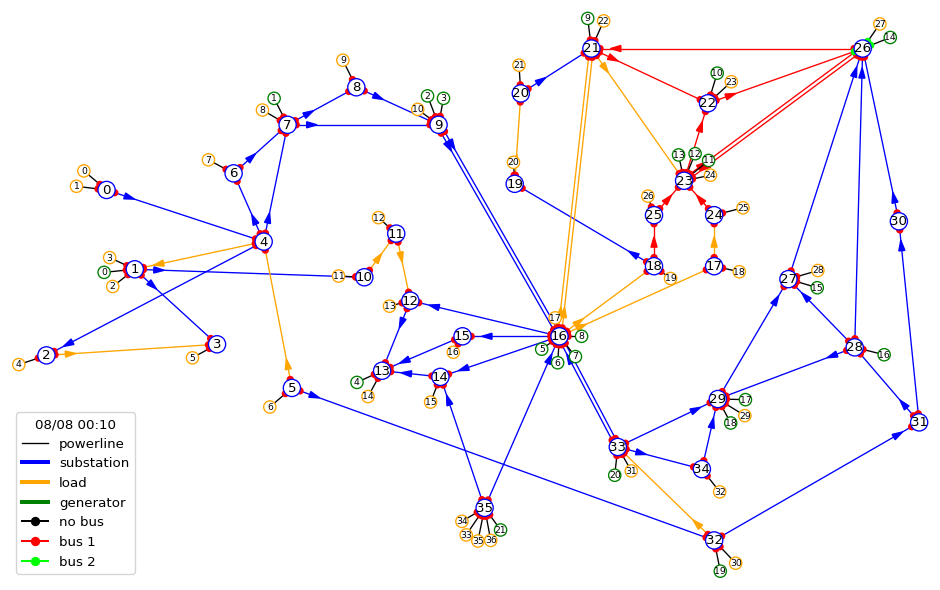

In [17]:
sub_state = get_valid_sub_action(action_space, unit_sub_1)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [18]:
unit_sub_2 = {sub_id: {}}

In [19]:
# Append unitary actions
append_unitary_actions(f'sub_{sub_id}', [unit_sub_1, unit_sub_2])

## Substation 22

In [20]:
sub_id = 22

In [21]:
unit_sub_1 = {sub_id: {"lines_id_bus": [(29, 2)], 
                       "gens_id_bus": [(10, 2)],
                      },
             }

/opt/anaconda3/lib/python3.7/site-packages/grid2op/PlotGrid/PlotMatplot.py:541: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  figure.tight_layout()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


Is ambigous??? -> False
Exception => []



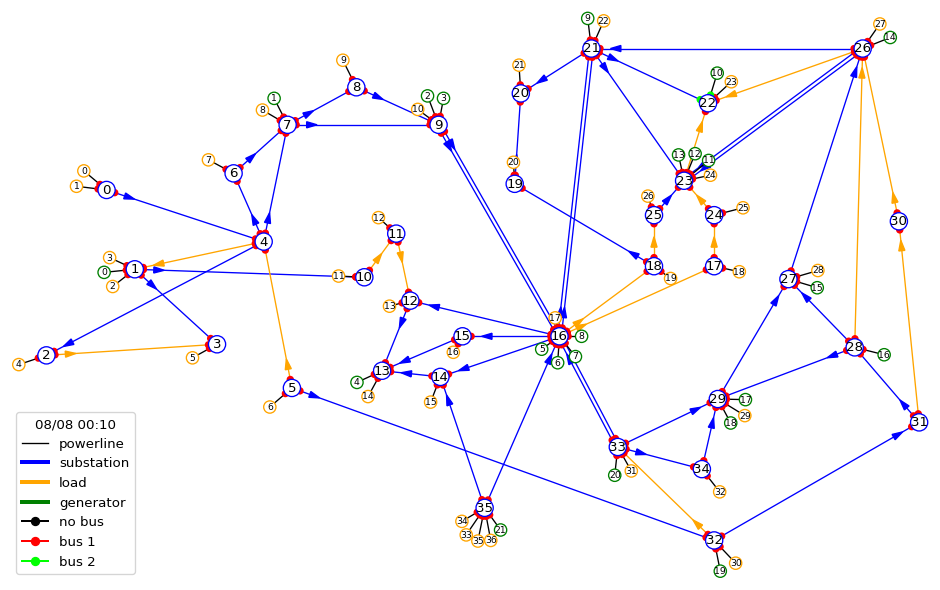

In [22]:
sub_state = get_valid_sub_action(action_space, unit_sub_1)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [23]:
unit_sub_2 = {sub_id: {}}

In [24]:
# Append unitary actions
append_unitary_actions(f'sub_{sub_id}', [unit_sub_1, unit_sub_2])

## Substation 21

In [25]:
sub_id = 21

In [26]:
unit_sub_1 = {sub_id: {"lines_id_bus": [(26, 2), (30, 2)], 
                      },
             }

/opt/anaconda3/lib/python3.7/site-packages/grid2op/PlotGrid/PlotMatplot.py:541: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  figure.tight_layout()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


Is ambigous??? -> False
Exception => []



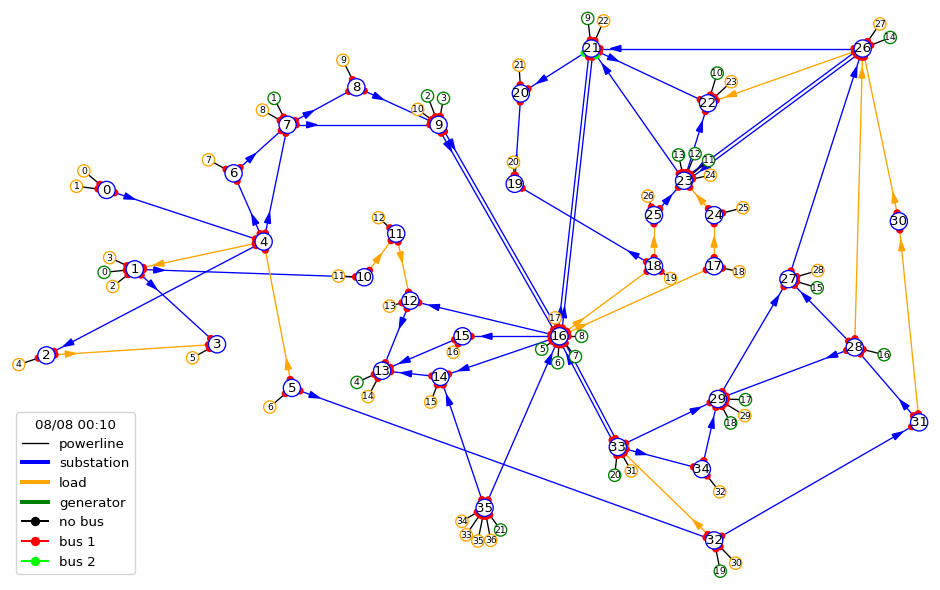

In [27]:
sub_state = get_valid_sub_action(action_space, unit_sub_1)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [28]:
unit_sub_2 = {sub_id: {"lines_id_bus": [(30, 2)], 
                       "gens_id_bus": [(9, 2)],
                      },
             }

/opt/anaconda3/lib/python3.7/site-packages/grid2op/PlotGrid/PlotMatplot.py:541: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  figure.tight_layout()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


Is ambigous??? -> False
Exception => []



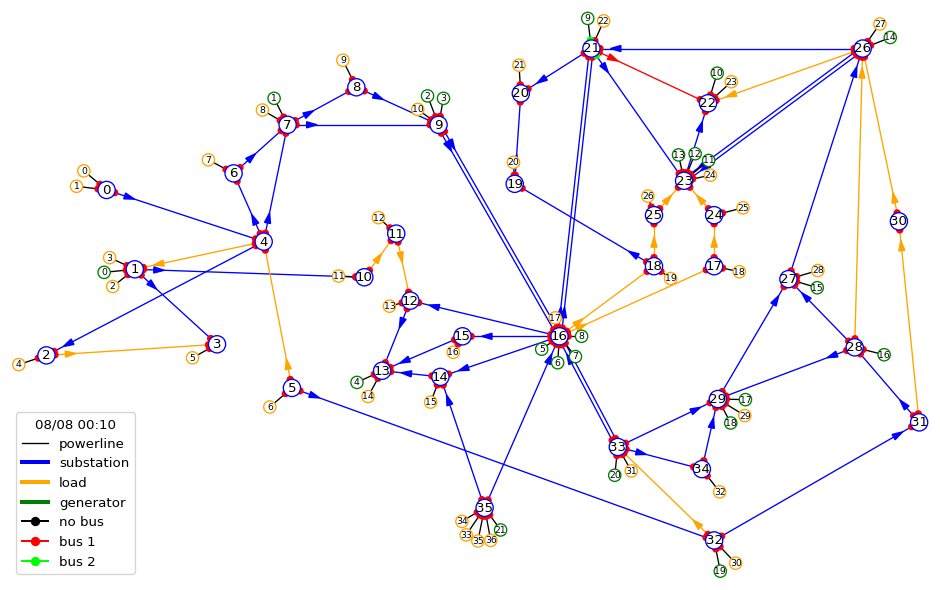

In [29]:
sub_state = get_valid_sub_action(action_space, unit_sub_2)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [30]:
unit_sub_3 = {sub_id: {}}

In [31]:
# Append unitary actions
append_unitary_actions(f'sub_{sub_id}', [unit_sub_1, unit_sub_2, unit_sub_3])

## Save as dict

In [32]:
names = 'actions_dict/unitary_actions_december_12.json'

with open(names, 'w') as f:
    json.dump(states, f)